## `Principal Component Analysis (PCA)`


- If there are too many features there in the dataset then it is not good for the ML Algorithms **`(Curse of Dimensionality)`**. 
- To remove this **`Curse of Dimensionality`** we can use any form of **Dimesionality Reduction**. There are mainly two techniques there to reduce dimensionality: **`Feature Selection`** and **`Feature Extraction`**.
- This is a technique of **`Feature Extraction`**. The other two techniques in **`Feature Extraction`** are: **LDA** and **tsne**.
- This technique is used in **`Unsupervised Machine Learning`** problems. That is there are no seperation between input and output features in the dataset.
- In **`PCA`** it mainly tries to bring a higher dimensional dataset to a lower dimension. The best part is it chooses the best possible lower dimension, so the essence (behaviours) of the data is not lost.
- **`Advantages:`**
    - It reduces the size of data in respect of dimensions, so the algorithm working on the data can perform faster.
    - It helps in visualization as it reduces the dimensions. Example: ploting a 10D data to a 3D plot.

**`How to select best features?`**

- When working with a data with multiple features where we don't have any idea about which feature is more important, then plot each feature and see wnich feature's distribution has the higher range (the spread of data is maximum), then select those features with higher ranges.
- When all the features (example 2 features) are imporatant (i.e. there is a linear realtion between the two features) but we can select only one feature, as here the **`Variance`** of both the columns are almost same so we need to use **`Feature Extraction`**.

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd

# We are here using plotly for plotting the dataset
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating the dataframe of 40 rows and 4 columns

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = df.append(df1, ignore_index=True)

df = df.sample(40)

df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [3]:
# Checking the shape of the dataframe

df.shape

(40, 4)

In [4]:
# plotting the data

fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'], color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.show()

**`Step 1 - Apply standard scaling`**

In [5]:
# apply scalling on all the input features

scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

**`Step 2 - Find Covariance Matrix`**

In [6]:
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


**`Step 3 - Finding Eigen_Values and Eigen_Vectors`**

In [7]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [8]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [9]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

TypeError: super(type, obj): obj must be an instance or subtype of type

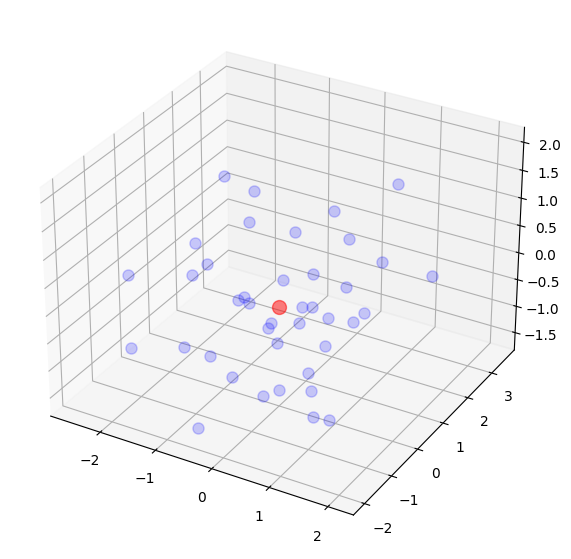

In [24]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', 
        markersize=10, color='red', alpha=0.5)

f1 = df['feature1'].mean()
f2 = df['feature2'].mean()
f3 = df['feature3'].mean()
arrow_prop_dict = dict(mutation_scale=20, lw=3, arrowstyle='-|>', color='k')
for v in eigen_vectors.T:
    a = Arrow3D([f1, v[0]], [f2, v[1]], [f3, v[2]], **arrow_prop_dict)
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [17]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [18]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [19]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()